Correction of ellipselineintshift (see pg 109) following intermediatereflections.

Mira

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *
from random import uniform

In [2]:
origin1 = [0,0] #x,y
origin2 = [90,0] #x,y
origin3 = [0,64]
origin4 = [90,64] #x,y 
coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X1,Y1,Z1,X2,Y2,Z2 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
X3,Y3,Z3,X4,Y4,Z4 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin2, 'pos')
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')
X72,Y72,Z72,X82,Y82,Z82 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin4, 'neg')
Xset, Yset, Zset = setrange2d(32.07, X1,Y1,Z1, origin1)
Xset2, Yset2, Zset2 = setrange2d(32.07, X2, Y2, Z2, origin1)
Xset3, Yset3, Zset3 = setrange2d(32.07, X3,Y3,Z3, origin2)
Xset4, Yset4, Zset4 = setrange2d(32.07, X4, Y4, Z4, origin2)
Xset5, Yset5, Zset5 = setrange2d(32.07, X52,Y52,Z52, origin3)
Xset6, Yset6, Zset6 = setrange2d(32.07, X62, Y62, Z62, origin3)
Xset7, Yset7, Zset7 = setrange2d(32.07, X72,Y72,Z72, origin4)
Xset8, Yset8, Zset8 = setrange2d(32.07, X82, Y82, Z82, origin4)

In [3]:
#there is clearly a problem above. attempting to corect ellipselineintshift
def ellipselineintshiftCORRECTING(pli,v1,coeffellipse,origin): #given point of line, vector, and the axes of the ellipse, find the intersection
    pli = [pli[0] - origin[0], pli[1] - origin[1], pli[2]] #shifting to (0,0,0) with respect to ellipse
    A = (1/coeffellipse[0]**2) + (v1[1]**2)/((v1[0]**2)*(coeffellipse[1])**2) + (v1[2]**2)/((v1[0]**2)*(coeffellipse[0]**2))
    B1 = -(2*pli[0]*(v1[1]**2))/((v1[0]**2)*coeffellipse[1]**2) -(2*pli[0]*(v1[2]**2))/((v1[0]**2)*coeffellipse[0]**2)
    B2 = (2*v1[1]*pli[1])/((v1[0])*coeffellipse[1]**2)+ (2*v1[2]*pli[2])/((v1[0])*coeffellipse[0]**2)
    B = B1 + B2
    C1 = ((pli[0]**2)*(v1[1]**2))/((v1[0]**2)*coeffellipse[1]**2) + ((pli[0]**2)*(v1[2]**2))/((v1[0]**2)*coeffellipse[0]**2)
    C2 = -(2*pli[0]*v1[1]*pli[1])/((v1[0])*(coeffellipse[1]**2)) -(2*pli[0]*v1[2]*pli[2])/((v1[0])*(coeffellipse[0]**2))
    C3 = (pli[2]**2)/(coeffellipse[0]**2) + (pli[1]**2)/(coeffellipse[1]**2)
    C = C1 + C2 + C3 - 1
    xint = [(-B + np.sqrt(B**2 - 4*A*C))/(2*A),(-B - np.sqrt(B**2 - 4*A*C))/(2*A)]
    yint = [((xint[0] - pli[0])/(v1[0]))*v1[1] + pli[1],((xint[1] - pli[0])/(v1[0]))*v1[1] + pli[1]]
    zint = [((xint[0] - pli[0])/(v1[0]))*v1[2] + pli[2], ((xint[1] - pli[0])/(v1[0]))*v1[2] + pli[2]]
    xintshift = [x + origin[0] for x in xint]
    yintshift = [y + origin[1] for y in yint]
    zintshift = zint
    #zintshift = [z + origin[2] for z in zint] (typically centered at zero)
    return xintshift,yintshift,zintshift

p = [0,250,0]
v = [92,-570, 2.56]
x,y,z = make_line(p, v, 800)
ellipseorigin = origin4
xint,yint,zint = ellipselineintshiftCORRECTING(p,v,coeffellipse, ellipseorigin)
xint[0], yint[0], zint[0]
#xint[1], yint[1], zint[1]

pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o')
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'white')
#pl3dsurf.plot(x,y,z, color = 'red')
pl.show()

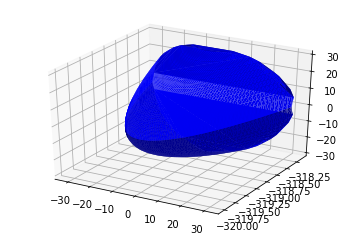

In [4]:
#first see if I can even get it to work on the negative side of the original (origin3)
p = [0,250,0]
v = [10,-570, 0]
x,y,z = make_line(p, v, 1000)
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot(x,y,z, color = 'red')
pl.show()
#THIS IS SHIFTED INCORRECTLY (see code below) so fix it.

ellipseorigin = origin3
xint,yint,zint = ellipselineintshiftCORRECTING(p,v,coeffellipse, ellipseorigin)
xint[0], yint[0], zint[0]
#xint[1], yint[1], zint[1]
#this is correct. the image above is incorrect. fix image.

def TAG(p,ori):
    p = [p[0] - ori[0], p[1]-ori[1]]
    return p[0], p[1]
a = [1,2]
b = [3,4]
TAG(a,b)
#IT SEEMS THAT THE FUNCTION SHOULD WORK. TEST WITH REGULAR ELLIPSE (ORIGIN1). IF STILL WRONG LITERALLY WORK OUT THE EQUATION

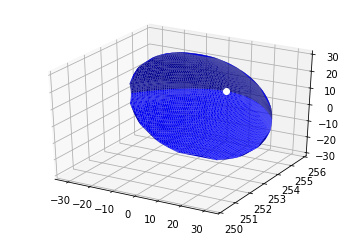

In [5]:
p1 = [0,250,0]
v1 = [-10,570, 0] #switched direction on y axis and that is it
x,y,z = make_line(p1, v1, 800)
ellipseorigin = origin1
xint,yint,zint = ellipselineintshiftCORRECTING(p,v,coeffellipse, ellipseorigin)

pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot(x,y,z, color = 'red')
pl3dsurf.plot([xint[1]], [yint[1]], [zint[1]], marker = 'o', color = 'white')
pl3dsurf.set_ylim(250,256)
pl.show()

#SO THIS ONE WORKS.

#testing problem with the SHIFTED ORIGINS
pl3d = pl.figure().gca(projection = '3d')
x,y,y2,z = createellipse([263.9,256,64.15])
pl3d.plot(x,y,z, 'blue')

x1,y1,z1 = rotatestrand(np.pi/2,[263.9,256,64.15] )
pl.plot(x1,y1,z1 ,'green')

x2,y2,z2 = rotatestrand(-np.pi/2,[263.9,256,64.15] )
pl.plot(x2,y2,z2 ,'red')

x3,y3,z3 = rotatestrand(np.pi,[263.9,256,64.15] )
pl.plot(x3,y3,z3 ,'orange')

x4,y4,z4 = rotatestrand(-np.pi/4,[263.9,256,64.15] )
pl.plot(x4,y4,z4 ,'purple')

origin1 = [400,95] #x,y
x5,y5,z5 = rotatestrandboundshift(-np.pi/4, [263.9,256,64.15], 500, origin1)
pl.plot(x5,y5,z5 ,'black')

origin2 = [0,95] #x,y
x6,y6,z6 = rotatestrandboundshift(np.pi, [263.9,256,64.15], 500, origin2)
pl.plot(x6,y6,z6 ,'black')
pl.show()
#PROBLEM IS EVIDENT HERE: CENTER IS SHIFTED POSITIVELY, SO BLACK SHOULD BE CLOSER TO THE CENTER. 
#INSTEAD IT IS FURTHER OUT. THIS IS THE CLEAR ERROR. FIX ROTATESTRANDBOUNDSHIFT.

#BELIEVE I AM ROTATING WRONG SIDE. 
def createellipseboundshift(coeffellipse,length, origin):
    xc=np.linspace(origin[0]-float(length)/2,origin[0]+float(length)/2,100)
    yc1 = np.sqrt((1-(((xc-origin[0])**2)/(coeffellipse[0]**2)))*coeffellipse[1]**2) + origin[1]
    yc2 = -np.sqrt((1-(((xc-origin[0])**2)/(coeffellipse[0]**2)))*coeffellipse[1]**2) + origin[1]
    zc = np.linspace(0,0,100)
    return xc,yc1,yc2,zc


#rotates a given ellipse around the x axis <-- PROBLEM! don't rotate around actual x-axis. rotate around GIVEN ORIGIN
def rotatestrandboundshiftNEG(theta, coeffellipse,length,origin):
    Rotated = []
    xc,yc1,yc2,zc = createellipseboundshift(coeffellipse,length,origin)
    for i in range (0,100): 
        v = [xc[i], yc2[i],zc[i]] # number of original points
        v2 = np.array(np.dot(v,Rx(theta))) #multiplied by rotation vector
        Rotated.append(v2[0]) #rotated vectors
        Rotated.append(v)
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100):
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

xc,yc1,yc2,zc = createellipseboundshift([263.9,256,64.15],256,[0,64])
pl3d = pl.figure().gca(projection = '3d')
pl3d.plot(xc,yc2,zc, 'black')
x,y,y2,z = createellipse([263.9,256,64.15])
pl3d.plot(x,y,z, 'blue')

x1,y1,z1 = rotatestrand(np.pi/2,[263.9,256,64.15] )
pl.plot(x1,y1,z1 ,'green')

x2,y2,z2 = rotatestrand(-np.pi/2,[263.9,256,64.15] )
pl.plot(x2,y2,z2 ,'red')

x3,y3,z3 = rotatestrand(np.pi,[263.9,256,64.15] )
pl.plot(x3,y3,z3 ,'orange')

x4,y4,z4 = rotatestrand(-np.pi/4,[263.9,256,64.15] )
pl.plot(x4,y4,z4 ,'purple')

origin1 = [400,95] #x,y
x5,y5,z5 = rotatestrandboundshift(-np.pi/4, [263.9,256,64.15], 500, origin1)
pl.plot(x5,y5,z5 ,'black')

origin2 = [0,95] #x,y
x6,y6,z6 = rotatestrandboundshift(np.pi, [263.9,256,64.15], 500, origin2)
pl.plot(x6,y6,z6 ,'black')
pl.show()
#yes this is now fixed. so now much change all code. 
#FOR NEW ORIGIN, DON'T ROTATE. USE Y2 FOR NEGATIVE SIDE OF ELLIPSE

In [6]:
#continuing now to try to fix how to shift (using y2)
def rotatestrandboundshiftCORRECTING(theta, coeffellipse,length,origin, sign):
    Rotated = []
    xc,yc1,yc2,zc = createellipseboundshift(coeffellipse,length,origin)
    if sign == 'pos':
        for i in range (0,100): 
            v = [xc[i], yc1[i],zc[i]] # number of original points
            v2 = np.array(np.dot(v,Rx(theta))) #multiplied by rotation vector
            Rotated.append(v2[0]) #rotated vectors
    if sign == 'neg':
        for i in range (0,100):
            v = [xc[i], yc2[i], zc[i]] #number of original points on NEGATIVE side of ellipse
            v2 = np.array(np.dot(v,Rx(theta)))
            Rotated.append(v2[0])
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100):
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

def createzboundshiftCORRECTING(a,n, coeffellipse, length, origin, sign):
    x1 = []
    y1 = []
    z1 = []
    for i in range (0,a):
        theta = np.linspace(0,n,a)
        x,y,z = rotatestrandboundshiftCORRECTING(theta[i], coeffellipse, length, origin, sign)
        x1.extend(x)
        y1.extend(y)
        z1.extend(z)
    return x1,y1,z1

def FTSCEllipsoidCORRECTING (a,n, coeffellipse, length, origin, sign):
    X,Y,Z = createzboundshiftCORRECTING(a,n, coeffellipse, length, origin, sign)
    X1,Y1,Z1 = createzboundshiftCORRECTING(a,-n, coeffellipse, length, origin, sign)
    if sign != 'pos' and sign != 'neg':
        print ('Error')
    return X,Y,Z, X1, Y1, Z1

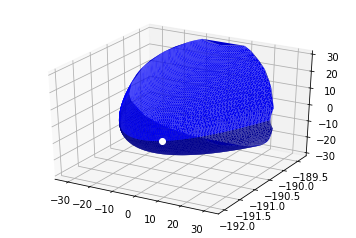

In [7]:
pl3dsurf = pl.figure().gca(projection = '3d')
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoidCORRECTING(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')
Xset5, Yset5, Zset5 = setrange2d(32.07, X52,Y52,Z52, origin3)
Xset6, Yset6, Zset6 = setrange2d(32.07, X62, Y62, Z62, origin3)
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')

ellipseorigin = origin3
xint,yint,zint = ellipselineintshiftCORRECTING(p,v,coeffellipse, ellipseorigin)
pl3dsurf.plot([xint[0]], [yint[0]], [zint[0]], marker = 'o', color = 'white')

pl.show()

In [8]:
#YES IT WORKED!!!!!!!!!!!!! THESE CORRECTIONS ARE CORRECT (MATCHES THE INTERSECTION POINTS GIVEN BEFORE)

In [98]:
#NOW testing the reflecting and incident on the REVERSED 


#GIVEN ellipse, point on line, vector of line, ellipse origin: incident and reflecting ray
#v: vector of line
#pli: point on line
def reflectellipsePOINTCORRECTING(coeffellipse,r,v,pli, ellipseorigin):
    c = tangcoef(pli,v,coeffellipse) #plane coefficients
    VectL = v #incident vector#defining points of incident vector
    #VectLinit = [-a for a in v]
    #VectLinit = v
    VectLNorm = norm(v) #incident unit vector
    dU, N = plane_info(c,r) #gradient and normal of plane
    #reflected ray
    #VectL2n = VectLNorm + 2*N #reflected vector
    VectL2 = VectLNorm - 2*N #IS IT PLUS OR MINUS
    VectLNorm2 = norm(VectL2) #reflected unit vector
    xp,yp,zp = make_plane(c,r) #plane
    xint,yint,zint = ellipselineintshiftCORRECTING(pli,v,coeffellipse, ellipseorigin)
    #pointintRETURN = [xint,yint,zint]
    pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
    pointintneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
    L1 = np.sqrt((pointint[0] - pli[0])**2 + (pointint[1] - pli[1])**2 + (pointint[2] - pli[2])**2)
    L1neg = np.sqrt((pointintneg[0] - pli[0])**2 + (pointintneg[1] - pli[1])**2 + (pointintneg[2] - pli[2])**2)
    xi,yi,zi = make_line(pli,VectL,L1) #incident line from intersection point
    xr,yr,zr = make_line(pointint,VectL2,L1)
    xin,yin,zin = make_line(pli,VectL,L1neg) #incident line from intersection point
    xrn,yrn,zrn = make_line(pointintneg,VectL2,L1neg)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2
#origin is origin of source
#FIGURE OUT HOW TO CHOOSE WHICH POINT (pointint or pointintneg) TO CHOOSE

#just changed for an origin that is [x,y] rather than [x,y,z]
def setrange3dindCORRECTING (xrange, X,Y,Z, origin, sign): #given range, one point, origin, if it lies in or not
    if sign == 'pos':
        if (X-origin[0])**2 + (Z)**2 < xrange**2 and Y > 0:
            return True
        return False
    if sign == 'neg':
        if (X-origin[0])**2 + (Z)**2 < xrange**2 and Y < 0:
            return True
        return False
    if sign != 'pos' and sign != 'neg':
        print ('Error')

#def reflect_specellipsePOINTCORRECTING(coeffellipse,r,pointints,vectors, xrange, sign):
#pointints: potential intersection points
#vectors: vectors of initial rays
#xrange: range of intersection points wanted
#sign: if the ellipse is on the positive or negative side 
def reflect_specellipsePOINTCORRECTING(coeffellipse,r,pli,vectors, xrange, ellipseorigin, sign):
    xi = []
    yi = []
    zi = []
    xr = []
    yr = []
    zr = []
    xp = []
    yp = []
    zp = []
    vect = []
    pointints = []
    for i in range (0, len(vectors)):
        Vi = vectors[i]
        Pli = pli[i] #(or pli/original points of lines)
        xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg, vectL2 = reflectellipsePOINTCORRECTING(coeffellipse,r,Vi,Pli,ellipseorigin)
        if setrange3dindCORRECTING(xrange, pointint[0], pointint[1], pointint[2],ellipseorigin, sign) == True: 
            xi.append(xiL)
            yi.append(yiL)
            zi.append(ziL)
            xr.append(xrL)
            yr.append(yrL)
            zr.append(zrL)
            xp.append(xpL)
            yp.append(ypL)
            zp.append(zpL)
            pointints.append(pointint) 
            vect.append(vectL2)
        if setrange3dindCORRECTING(xrange, pointintneg[0], pointintneg[1], pointintneg[2], ellipseorigin, sign) == True:
            xi.append(xinL)
            yi.append(yinL)
            zi.append(zinL)
            xr.append(xrnL)
            yr.append(yrnL)
            zr.append(zrnL)
            xp.append(xpL)
            yp.append(ypL)
            zp.append(zpL)
            pointints.append(pointintneg)
            vect.append(vectL2)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints, vect



r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = np.pi/2
specnum = 1000
xrange = 23.07

#xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints, vect = reflect_specORIGINellipsePOINT(coeffellipse,r,origin,L, theta, specnum, xrange, 'pos')

In [74]:
r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = np.pi/2
specnum = 1000
xrange = 23.07
ellipseorigin = origin3
pli = [0,250,0]
v = [10,-570, .1]

xi1,yi1,zi1,xr1,yr1,zr1,xp1,yp1,zp1,xin1,yin1,zin1,xrn1,yrn1,zrn1, pointint1, pointintneg1, VectL21 = reflectellipsePOINTCORRECTING(coeffellipse,r,v,pli, ellipseorigin)

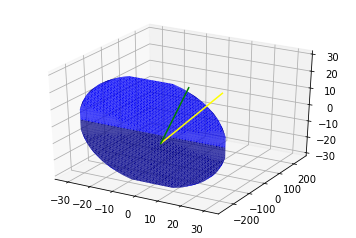

In [75]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot(xi1,yi1,zi1, color = 'yellow')
pl3dsurf.plot(xr1,yr1,zr1, color = 'green')
pl.show()
#clearly the right 'point' chosen, BUT HOW??? CHECK

pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot(xin1,yin1,zin1, color = 'yellow')
pl3dsurf.plot(xrn1,yrn1,zrn1, color = 'green')
pl.show()

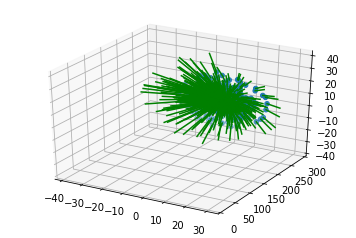

In [145]:
#original ellipse and source 
r1 = int(100)
origin1 = [0,250,0] #(x0,y0,z0)
L1 = int(300)
coeffellipse = [263.9,256,64.15]
theta1 = np.pi/2
specnum1 = 1000
xrange = 23.07

xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints1, vect = reflect_specORIGINellipsePOINT(coeffellipse,r1,origin1,L1, theta1, specnum1, xrange, 'pos')

pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'blue')
for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    #pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
xint, yint, zint = getpoints(pointints1)
pl3dsurf.scatter(xint,yint,zint) #intersection and starting point for NEXT ellipse
pl3dsurf.set_ylim([0,300])
#pl3dsurf.set_zlim([0,30])
#pl3dsurf.set_xlim([0,30])
pl.show()



pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green')
pl.show()

In [152]:
#SO NOW USING THE REFLECTED RAYS HERE AS the incident rays on the ellipse across from it
#intersection points => origin points for 
#reflection rays ==> incident rays
coeffellipse = [263.9,256,64.15]
xrange = 23.07
vect2 = [-x for x in vect]
xi2,yi2,zi2,xr2,yr2,zr2,xp2,yp2,zp2, pointints2, vect2 = reflect_specellipsePOINTCORRECTING(coeffellipse,r,pointints1,vect2, xrange,origin3, 'neg')






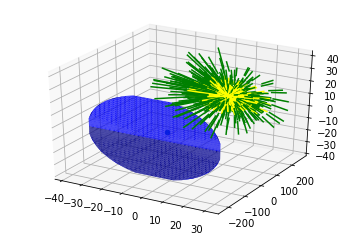

In [153]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
xint, yint, zint = getpoints(pointints2)
pl3dsurf.scatter(xint,yint,zint)
pl.show()

#clearly the intersection points are wrong lol OH FUCK they're the original intersection points. need the next ones.
#yay now it works?

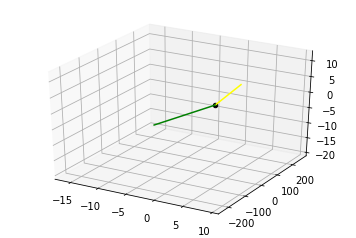

In [154]:
pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
for n in range (0,len(xi2)):
    #pl3dsurf.scatter(pointints2[n][0], pointints2[n][1], pointints2[n][2], color = 'black')
    pl3dsurf.plot(xi2[n],yi2[n],zi2[n], color = 'yellow') #intial
    pl3dsurf.plot(xr2[n],yr2[n],zr2[n], color = 'green') #reflected
#xint, yint, zint = getpoints(pointints2)
pl3dsurf.scatter(xint,yint,zint, color = 'black')
pl.show()

#shit ok the rays don't seem to be working. See page 113 for literally handwriting this all out... 
#is a problem with reflect_specellipsePOINTCORRECTING because basic reflection DOES work. 

#ok so now it seems the initial ray isn't working but the reflecting is?

#OMG IT'S WORKING!!!!!!!!!!

#problem with vector length?
def plus(x):
    return x + 1

def testing(a):
    less5 = []
    for i in range (0, len(a)):
        y = a[i]
        x = plus(y)
        if x < 5:
            less5.append(x)
        if x > 6:
            less5.append(x)
    return less5
bab = [1,2,3,4,5,6,7,8]
smif = testing(bab)
smif


In [ ]:
#to test this very simply with try to get just one beam to ricochet between two ellipses (to be generalized later)

r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = np.pi/2
specnum = 1000
xrange = 23.07
ellipseorigin = origin3
pli = [0,250,0]
v = [10,-570, .1]

xi1,yi1,zi1,xr1,yr1,zr1,xp1,yp1,zp1,xin1,yin1,zin1,xrn1,yrn1,zrn1, pointint1, pointintneg1, VectL21 = reflectellipsePOINTCORRECTING(coeffellipse,r,v,pli, ellipseorigin)






In [143]:
origin1 = [0,-32] #x,y
origin2 = [90,-32] #x,y
origin3 = [0,32] #x,y
origin4 = [90,32] #x,y

#INITIAL ray (see diagram on pg 112)
pli1 = [0,200,0.001]
vi1 = [1,20,2]
coeffellipse = [263.9,256,64.15]
xi1,yi1,zi1,xr1,yr1,zr1,xp1,yp1,zp1,xin1,yin1,zin1,xrn1,yrn1,zrn1, pointint1, pointintneg1, VectL21 = reflectellipsePOINTCORRECTING(coeffellipse,r,v1,pli1, origin1)

#checking which intersection is correct (ON THE FIRST ELLIPSE)
print(setrange3dindCORRECTING(23.07, pointint1[0], pointint1[1], pointint1[2],origin1, 'pos')) 
print(setrange3dindCORRECTING(23.07, pointintneg1[0], pointintneg1[1], pointintneg1[2],origin1, 'pos')) #correct

#REFLECTED ray 1 ==> INITIAL ray 2

#doing it by hand (copying directly instead of calling from previous function)
print(VectL21) #perhaps a problem with the lack of commas etc??
print(pointintneg1)
#pli2 = [-0.4210469152127906, 223.99967416712906, 0.001]
#vi2 = [ 7.63416468e-02, -2.99898158e+00, 7.35195675e-06]
VectL21 = [-x for x in VectL21]
xi2,yi2,zi2,xr2,yr2,zr2,xp2,yp2,zp2,xin2,yin2,zin2,xrn2,yrn2,zrn2, pointint2, pointintneg2, VectL22 = reflectellipsePOINTCORRECTING(coeffellipse,r,VectL21,pointintneg1, origin3)

#xi2,yi2,zi2,xr2,yr2,zr2,xp2,yp2,zp2,xin2,yin2,zin2,xrn2,yrn2,zrn2, pointint2, pointintneg2, VectL22 = reflectellipsePOINTCORRECTING(coeffellipse,r,VectL21,pointintneg1, origin3)

#checking which intersection is correct (ON THE SECOND ELLIPSE)
print(setrange3dindCORRECTING(23.07, pointint2[0], pointint2[1], pointint2[2],origin3, 'neg')) #correct
print(setrange3dindCORRECTING(23.07, pointintneg2[0], pointintneg2[1], pointintneg2[2],origin3, 'neg')) 



False
True
[ -7.63416468e-02   2.99898158e+00  -7.35195675e-06]
[-0.4210469152127906, 223.99967416712906, 0.001]
True
False


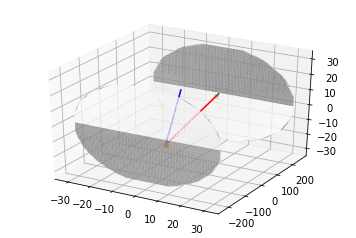

In [144]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'white')

#initial
pl3dsurf.plot(xin1,yin1,zin1, color = 'yellow')
pl3dsurf.plot(xrn1,yrn1,zrn1, color = 'green')
pl3dsurf.scatter(pointintneg1[0], pointintneg1[1], pointintneg1[2])

#secondary
pl3dsurf.plot(xi2,yi2,zi2, color = 'red')
pl3dsurf.plot(xr2,yr2,zr2, color = 'blue') #<-- this is the problem. the initials are hte same, it is the reflection that is wrong
pl3dsurf.scatter(pointint2[0], pointint2[1], pointint2[2])

pl.show()
#clearly the right 'point' chosen, BUT HOW??? CHECK
#OK THIS IS WRONG LOL. change the sign of VectL2 when it is made into the initial from the reflected!

#THIS WORKS. NOW APPLY IT TO THE FUNCTIONS ABOVE! (with the entire source)

In [159]:
vectset = [[1,1,1], [2,2,2]]
def negvect(vect):
    vectset = [[-y for y in x] for x in vect]
    return vectset

[[-1, -1, -1], [-2, -2, -2]]